In [15]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [16]:
import tensorflow as tf
from tensorflow import keras

In [17]:
test_dir =r'C:\Users\Aishwarya Patil\Desktop\ML Projects\CNN models\cats_and_dogs_small\test'
validation_dir =r'C:\Users\Aishwarya Patil\Desktop\ML Projects\CNN models\cats_and_dogs_small\validation'
train_dir =r'C:\Users\Aishwarya Patil\Desktop\ML Projects\CNN models\cats_and_dogs_small\train'

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
from tensorflow.keras.applications import VGG16
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

58889256/58889256 [==============================] - 3s 0us/step


In [24]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [20]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [25]:
model = models.Sequential()

model.add(conv_base)

model.add(layers.Flatten())


model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(1,activation ='sigmoid'))

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])

In [28]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [29]:
history =model.fit_generator(train_generator,steps_per_epoch = 100,epochs=30,validation_data = validation_generator,validation_steps = 50,callbacks=[checkpoint_cb])

C:\Users\Aishwarya Patil\AppData\Local\Temp\ipykernel_9052\1209161019.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history =model.fit_generator(train_generator,steps_per_epoch = 100,epochs=30,validation_data = validation_generator,validation_steps = 50,callbacks=[checkpoint_cb])


Epoch 1/30
100/100 [==============================] - 660s 7s/step - loss: 0.4521 - acc: 0.7785 - val_loss: 0.1722 - val_acc: 0.9320
Epoch 2/30
100/100 [==============================] - 672s 7s/step - loss: 0.2766 - acc: 0.8875 - val_loss: 0.1312 - val_acc: 0.9530
Epoch 3/30
100/100 [==============================] - 715s 7s/step - loss: 0.1956 - acc: 0.9195 - val_loss: 0.1565 - val_acc: 0.9310
Epoch 4/30
100/100 [==============================] - 701s 7s/step - loss: 0.1875 - acc: 0.9235 - val_loss: 0.2000 - val_acc: 0.9260
Epoch 5/30
100/100 [==============================] - 660s 7s/step - loss: 0.1544 - acc: 0.9410 - val_loss: 0.4344 - val_acc: 0.8600
Epoch 6/30
100/100 [==============================] - 652s 7s/step - loss: 0.1369 - acc: 0.9385 - val_loss: 0.0871 - val_acc: 0.9600
Epoch 7/30
100/100 [==============================] - 636s 6s/step - loss: 0.1099 - acc: 0.9535 - val_loss: 0.0902 - val_acc: 0.9620
Epoch 8/30
100/100 [==============================] - 647s 6s/step - 

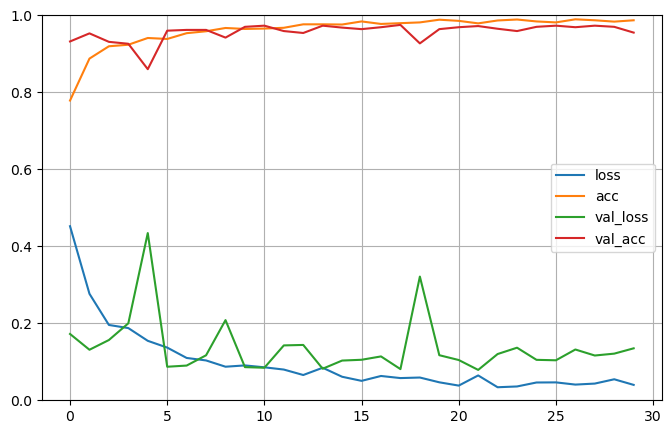

In [30]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [31]:
hist_df=pd.DataFrame(history.history)

In [32]:
hist_csv_file='history.csv'
with open(hist_csv_file,mode='w') as f:
    hist_df.to_csv(f)

In [33]:
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [34]:
model.evaluate_generator(test_generator,steps=50)

C:\Users\Aishwarya Patil\AppData\Local\Temp\ipykernel_9052\2075860562.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator,steps=50)


[0.16825906932353973, 0.9520000219345093]